In [1]:
# finished pipeline for the application on new data should be: data import - preprocess - NER - SA - analysis (plots)

plots:

pie plot of sentiment with entities

bar chart of sentiment with entities

bar chart for most frequently mentioned entities

most common entities per sentiment

word cloud for key words by sentiment

time-based line plots for specific entities/for specific companies with different lines for entity-related posts?

In [2]:
import pandas as pd
import json
df_results = pd.read_csv("./data after SA.csv")
df_results["entities"] = df_results["entities"].apply(json.loads)
df_results.head()

,Unnamed: 0.1,Unnamed: 0,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,entities,sentiment_prediction
0,0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,"[{'word': '.', 'entity': 'B-person'}, {'word':...",1
1,1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,2,"[{'word': '@', 'entity': 'B-person'}, {'word':...",2
2,2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,2,"[{'word': '@', 'entity': 'B-person'}, {'word':...",2
3,3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,"[{'word': 'Ġfestival', 'entity': 'B-event'}, {...",1
4,4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,2,"[{'word': 'xt', 'entity': 'I-event'}, {'word':...",2


In [3]:
df_results = df_results[["tweet_text", "sentiment_prediction", "entities"]]
df_results.head()

,tweet_text,sentiment_prediction,entities
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,1,"[{'word': '.', 'entity': 'B-person'}, {'word':..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,2,"[{'word': '@', 'entity': 'B-person'}, {'word':..."
2,@swonderlin Can not wait for #iPad 2 also. The...,2,"[{'word': '@', 'entity': 'B-person'}, {'word':..."
3,@sxsw I hope this year's festival isn't as cra...,1,"[{'word': 'Ġfestival', 'entity': 'B-event'}, {..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,2,"[{'word': 'xt', 'entity': 'I-event'}, {'word':..."


In [4]:
df_results["entity_types"] = df_results["entities"].apply(lambda x: list({d["entity"].split("-", 1)[-1] for d in x if d["entity"].split("-", 1)[-1] not in d}))

df_results.head()

,tweet_text,sentiment_prediction,entities,entity_types
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,1,"[{'word': '.', 'entity': 'B-person'}, {'word':...","[person, location, product]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,2,"[{'word': '@', 'entity': 'B-person'}, {'word':...","[person, corporation, product, event]"
2,@swonderlin Can not wait for #iPad 2 also. The...,2,"[{'word': '@', 'entity': 'B-person'}, {'word':...","[person, product, event]"
3,@sxsw I hope this year's festival isn't as cra...,1,"[{'word': 'Ġfestival', 'entity': 'B-event'}, {...","[event, product]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,2,"[{'word': 'xt', 'entity': 'I-event'}, {'word':...","[person, corporation, event]"


In [5]:
df_results.dtypes

tweet_text              object
sentiment_prediction     int64
entities                object
entity_types            object
dtype: object

In [6]:
df_results["entity_types"] = list(df_results["entity_types"])
df_results.head()

,tweet_text,sentiment_prediction,entities,entity_types
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,1,"[{'word': '.', 'entity': 'B-person'}, {'word':...","[person, location, product]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,2,"[{'word': '@', 'entity': 'B-person'}, {'word':...","[person, corporation, product, event]"
2,@swonderlin Can not wait for #iPad 2 also. The...,2,"[{'word': '@', 'entity': 'B-person'}, {'word':...","[person, product, event]"
3,@sxsw I hope this year's festival isn't as cra...,1,"[{'word': 'Ġfestival', 'entity': 'B-event'}, {...","[event, product]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,2,"[{'word': 'xt', 'entity': 'I-event'}, {'word':...","[person, corporation, event]"


In [7]:
# renaming sentiment scores for easier interpretation
df_results["sentiment_prediction"] = df_results["sentiment_prediction"].replace({0 : "negative", 1 : "neutral", 2 : "positive"})

<Axes: >

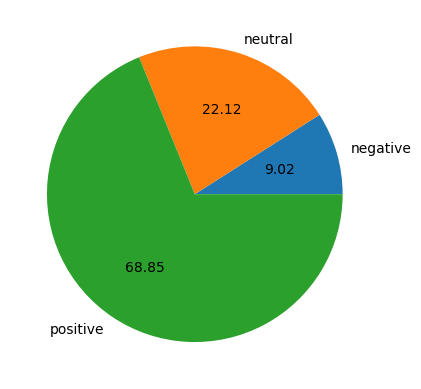

In [8]:
import matplotlib.pyplot as plt

df_results.groupby("sentiment_prediction").size().plot(kind='pie', autopct='%.2f')

In [9]:
#df_results.groupby("entity_types").plot(kind="bar")

In [10]:
#df_results = df_results["product" in df_results["entity_types"]]

In [11]:
# entity = "product"
# df_results["entity_types"] = df_results["entity_types"].apply(lambda x: entity in x)
# df_results.head()

In [12]:
# function to create plots showing the sentiment for each tweet that contains a mention of a certain entity
def plot_sentiment_by_entity_types(df, entity):
    df["entity_mentioned"] = df["entity_types"].apply(lambda x: entity in x)
    df = df[df["entity_mentioned"]==True]
    df.groupby("sentiment_prediction").size().plot(kind="pie", autopct="%.2f", title=f"Sentiment in all tweets containing mentions of a {entity}")

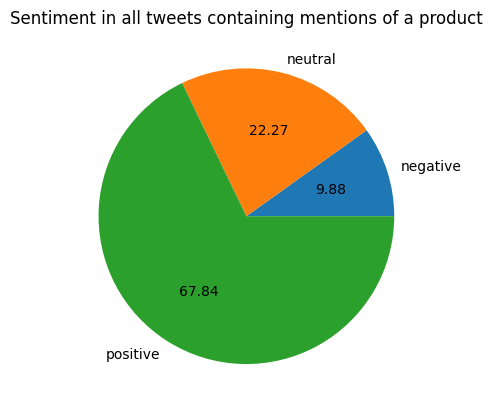

In [13]:
plot_sentiment_by_entity_types(df_results, "product")

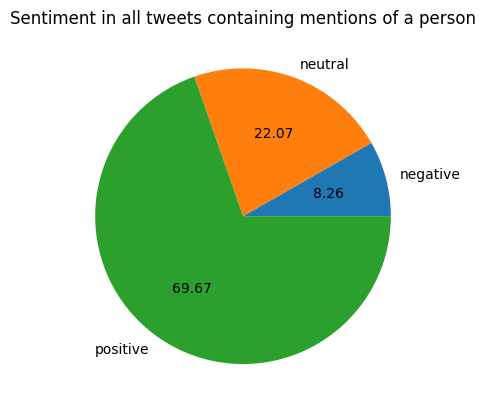

In [14]:
plot_sentiment_by_entity_types(df_results, "person")

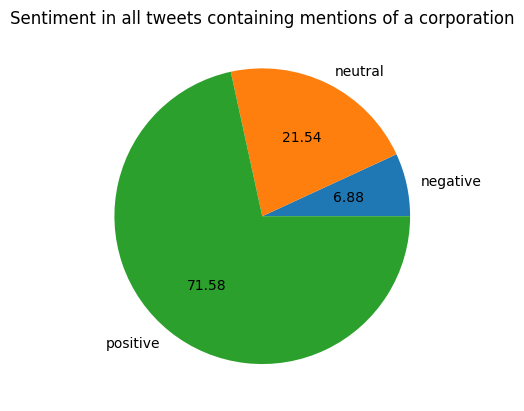

In [15]:
plot_sentiment_by_entity_types(df_results, "corporation")

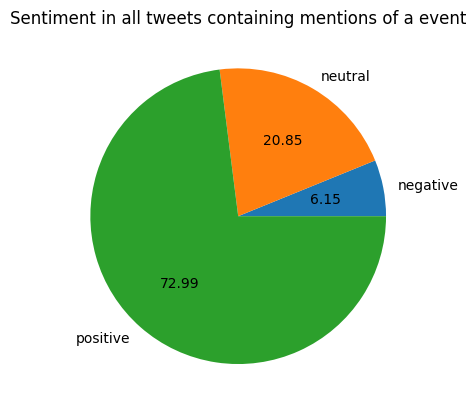

In [16]:
plot_sentiment_by_entity_types(df_results, "event")

possible conclusion: 

postings mentioning products are slightly more negative

posts about persons are more positive

posts containing mentions of corporations are the most positive on average

In [17]:
unique_entities = []
for index, row in df_results.iterrows():
    for element in row["entity_types"]:
        if element not in unique_entities:
            unique_entities.append(element)

In [18]:
print(unique_entities)

['person', 'location', 'product', 'corporation', 'event', 'group', 'creative_work']


In [19]:
# bar chart with a bar for every entity, displaying the percentage of postings with a certain sentiment that this entity was mentioned in 
# (e.g. how many percent of all positive/negative/neutral postings contain mentions of an entity)
def plot_sentiment_barchart_by_entity(df, sentiment):
    dic = {}
    for entity_type in unique_entities:
        df["entity_mentioned"] = df["entity_types"].apply(lambda x: entity_type in x)
        filtered_df = df[(df["sentiment_prediction"]==sentiment) & (df["entity_mentioned"]==True)]
        percentage = len(filtered_df)/len(df[df["sentiment_prediction"]==sentiment])
        dic[entity_type] = percentage

    print(dic)
    
    x = range(len(dic))
    y = list(dic.values())
    plt.bar(x, y, align="center")
    plt.xticks(range(len(dic)), list(dic.keys()))

    for i in range(len(x)):
        v = f"{round(y[i]*100, 2)}%"
        plt.text(i, y[i], v, ha = "center")
    
    plt.title(f"Percentage of {sentiment} postings mentioning the entity type")
    plt.show()


{'person': 0.293909973521624, 'location': 0.23036187113857018, 'product': 0.6451897616946161, 'corporation': 0.6747572815533981, 'event': 0.49735216240070607, 'group': 0.04324801412180053, 'creative_work': 0.02824360105913504}


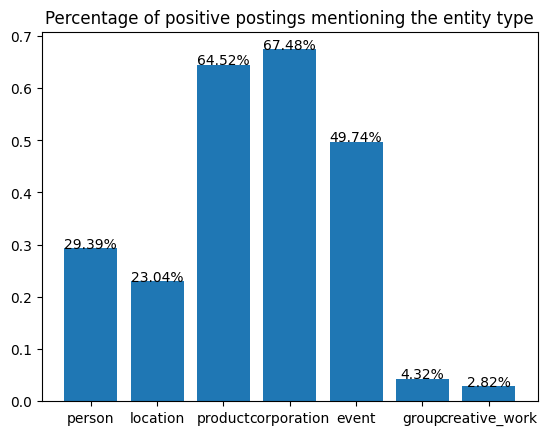

In [20]:
plot_sentiment_barchart_by_entity(df_results, "positive")

{'person': 0.265993265993266, 'location': 0.1447811447811448, 'product': 0.7171717171717171, 'corporation': 0.494949494949495, 'event': 0.31986531986531985, 'group': 0.037037037037037035, 'creative_work': 0.010101010101010102}


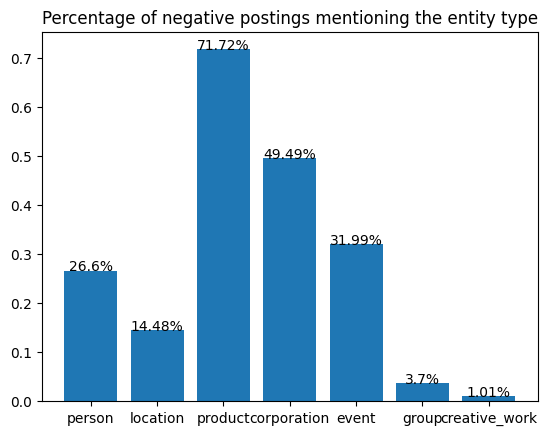

In [21]:
plot_sentiment_barchart_by_entity(df_results, "negative")

{'person': 0.28983516483516486, 'location': 0.2239010989010989, 'product': 0.6593406593406593, 'corporation': 0.6318681318681318, 'event': 0.4423076923076923, 'group': 0.03159340659340659, 'creative_work': 0.023351648351648352}


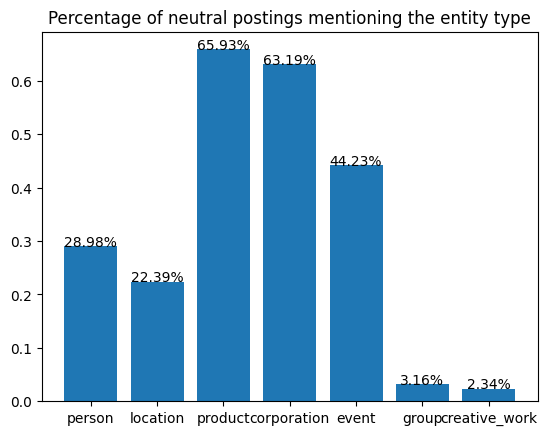

In [22]:
plot_sentiment_barchart_by_entity(df_results, "neutral")

possible conclusions:

most positive postings contain mention of a corporation

most negative postings contain mention of a product

negative postings have the highest percentage of product-mentions of all sentiments